In [1]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import preprocessing_functions
from pycaret.classification import *

Loading the data

In [2]:
fitbit_df = pd.read_pickle('data/fitbit_to_baseline_model.pkl')
fitbit_df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e301e67b776a240608a72,2021-05-24,34.710232,NaN,NaN,NaN,NaN,74.0,0.700000,0.700,0.833333,-1.822489,3682.90,46.44026,8567.1,81.644017,227.0,8.0,3.0,729.0,NaN,61.390017,28380000.0,0.0,408.0,65.0,0.0,94.0,0.892157,0.928571,0.847826,0.922222,12441.0,164.0,997.0,49.0,0.0,0.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e301367b776a24057738e,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2147.17,49.73933,5337.8,104.619583,61.0,3.0,43.0,1333.0,NaN,72.436947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7279.0,32.0,236.0,30.0,0.0,1.0,0.0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,621e360b67b776a24039709f,2021-05-24,NaN,68.321,31.413,NaN,15.4,69.0,0.633333,0.650,0.800000,-2.055332,1723.61,45.23770,5028.5,77.061042,272.0,8.0,2.0,723.0,NaN,68.243822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7493.0,127.0,1306.0,7.0,0.0,1.0,1.0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,621e2fce67b776a240279baa,2021-05-24,34.783747,83.170,15.941,96.6,15.2,70.0,0.733333,0.725,0.633333,-0.720949,2393.99,43.67853,2444.9,94.808800,143.0,0.0,0.0,796.0,NaN,85.806939,30060000.0,0.0,438.0,63.0,19.0,96.0,1.079545,1.145455,1.240741,0.663717,3317.0,701.0,735.0,0.0,0.0,0.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,621e345267b776a240691064,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1339.20,NaN,NaN,NaN,0.0,0.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4960,621e310d67b776a24003096d,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1252.80,NaN,NaN,NaN,0.0,0.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4961,621e324e67b776a2400191cb,2022-01-17,33.104768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.469242,2150.69,44.99934,3079.0,NaN,176.0,4.0,5.0,579.0,NaN,63.885053,19320000.0,0.0,272.0,50.0,0.0,96.0,1.050000,0.961538,0.974093,0.381818,4278.0,NaN,NaN,NaN,NaN,1.0,0.0,2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4962,621e30f467b776a240f22944,2022-01-17,34.352490,NaN,NaN,NaN,13.4,NaN,NaN,NaN,NaN,-2.346201,1864.23,60.17697,2233.9,63.148837,157.0,0.0,0.0,706.0,NaN,58.144251,29940000.0,0.0,421.0,78.0,0.0,94.0,0.701754,1.368421,1.103806,0.849315,3122.0,2.0,1348.0,0.0,0.0,0.0,0.0,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Gender prediction

In [3]:
data = fitbit_df.drop(columns=['date','age', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

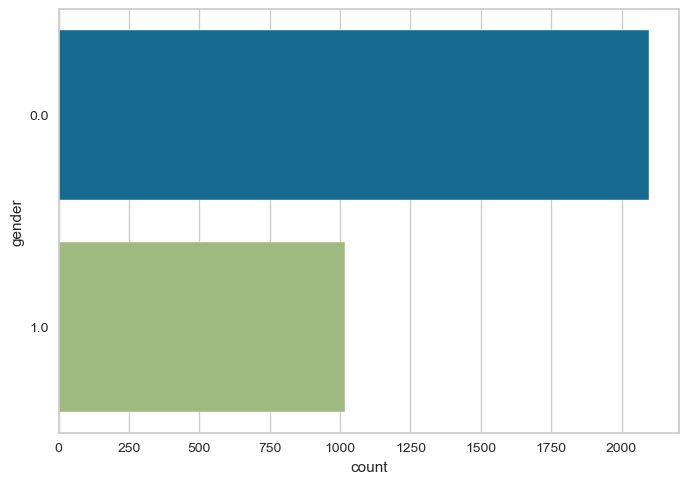

In [4]:
sns.countplot(y="gender", data=train_data)

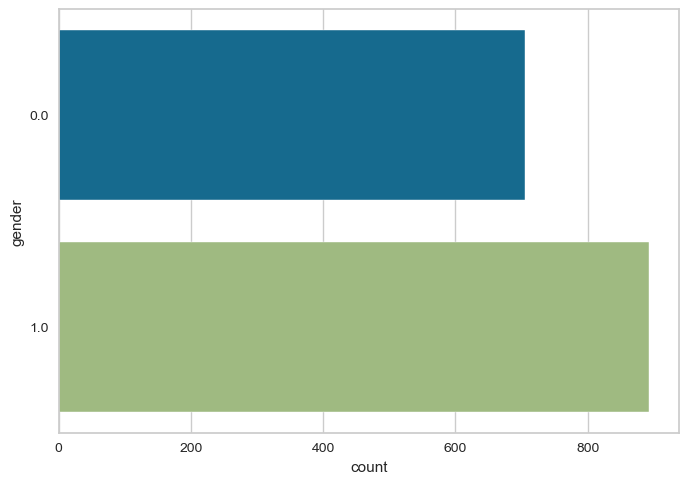

In [5]:
sns.countplot(y="gender", data=test_data)

In [6]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [7]:
s = setup(data=train_data, target='gender', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,gender
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 55)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9126,0.0000,0.8233,0.9484,0.8538,0.7978,0.8231,0.0500
lda,Linear Discriminant Analysis,0.9085,0.9644,0.8233,0.9396,0.8487,0.7892,0.8154,0.1333
lightgbm,Light Gradient Boosting Machine,0.9068,0.9595,0.8647,0.8786,0.8631,0.7920,0.8007,1.2367
gbc,Gradient Boosting Classifier,0.9029,0.9539,0.8472,0.8815,0.8541,0.7811,0.7913,1.4533
ada,Ada Boost Classifier,0.8991,0.9373,0.7883,0.9141,0.8344,0.7623,0.7776,0.6500
rf,Random Forest Classifier,0.8388,0.8943,0.6485,0.8618,0.7152,0.6127,0.6414,0.4567
et,Extra Trees Classifier,0.8386,0.9012,0.5894,0.9152,0.7021,0.6047,0.6409,0.4933
dt,Decision Tree Classifier,0.8243,0.8156,0.7697,0.7372,0.7365,0.6064,0.6212,0.0600
knn,K Neighbors Classifier,0.7331,0.7337,0.4542,0.6285,0.5226,0.3468,0.3573,2.8067
lr,Logistic Regression,0.6908,0.7269,0.4321,0.3515,0.3855,0.2501,0.2538,4.3533


In [9]:
best

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

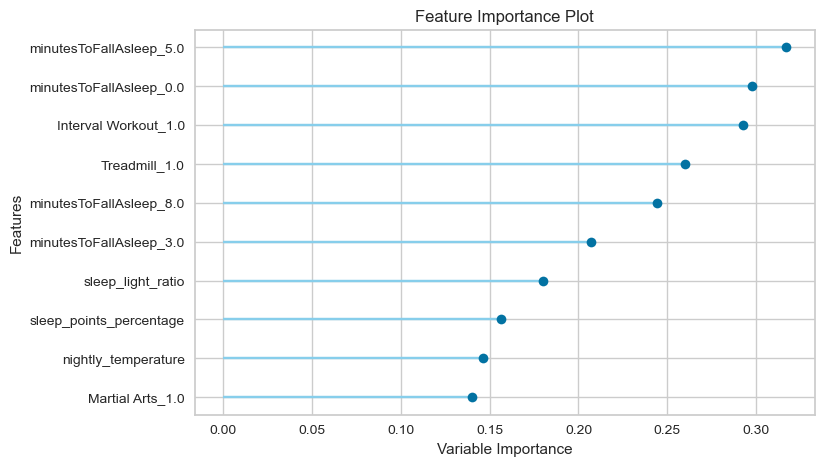

In [10]:
plot_model(best, plot='feature')

Age prediction

In [11]:
data = fitbit_df.drop(columns=['date', 'gender', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

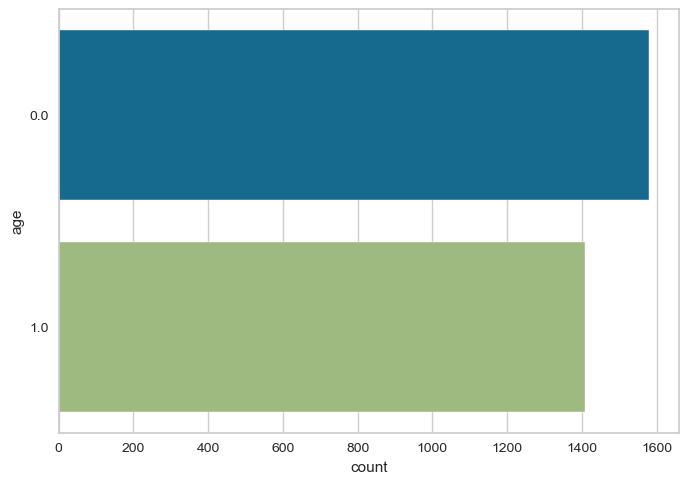

In [12]:
sns.countplot(y="age", data=train_data)

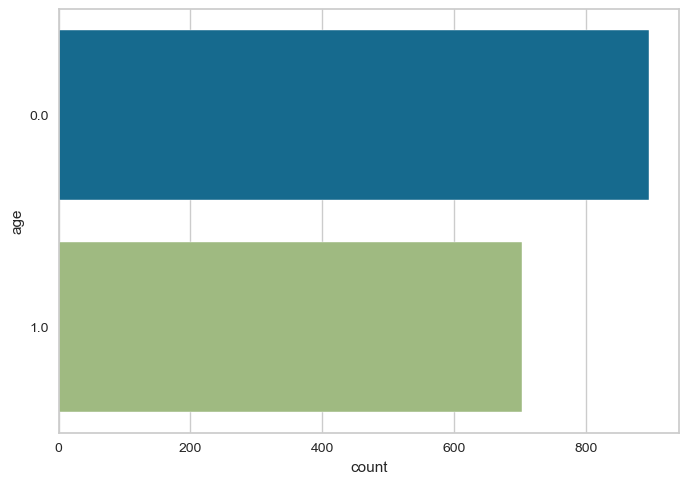

In [13]:
sns.countplot(y="age", data=test_data)

In [14]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [15]:
s = setup(data=train_data, target='age', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,age
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(3308, 55)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.6343,0.0000,0.3333,0.2208,0.2657,0.0000,0.0000,0.1633
et,Extra Trees Classifier,0.6003,0.6005,0.5370,0.6067,0.5350,0.2063,0.2438,0.5667
rf,Random Forest Classifier,0.5842,0.6279,0.5120,0.5885,0.5028,0.1736,0.2176,0.6967
dt,Decision Tree Classifier,0.5666,0.5848,0.4635,0.5660,0.4735,0.1343,0.1671,0.1633
gbc,Gradient Boosting Classifier,0.5647,0.6645,0.5552,0.5858,0.5292,0.1657,0.1990,1.4700
lightgbm,Light Gradient Boosting Machine,0.5645,0.6627,0.5413,0.5724,0.5132,0.1512,0.1942,1.1767
ada,Ada Boost Classifier,0.5506,0.6336,0.5913,0.5509,0.5416,0.1381,0.1564,0.5000
nb,Naive Bayes,0.5438,0.5310,0.3153,0.5349,0.3896,0.0625,0.0780,0.1500
qda,Quadratic Discriminant Analysis,0.5434,0.5194,0.7866,0.4885,0.6012,0.0353,0.0422,0.1400
ridge,Ridge Classifier,0.4965,0.0000,0.3622,0.4913,0.4002,-0.0082,0.0121,0.1033


In [17]:
best

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

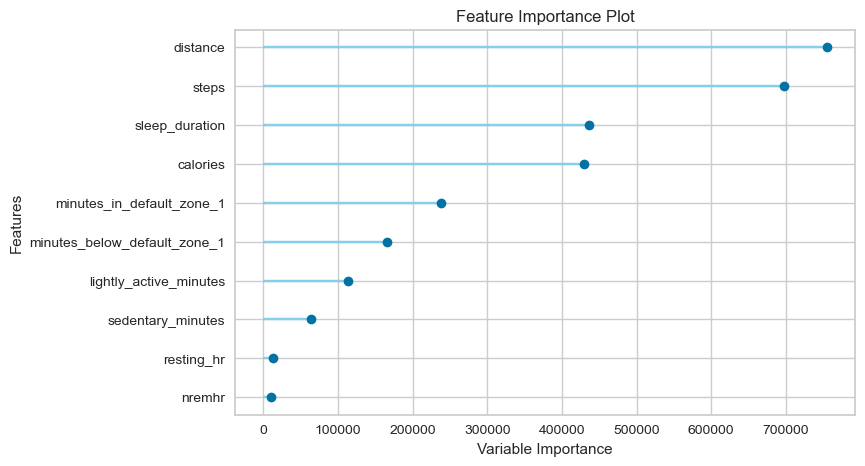

In [18]:
plot_model(best, plot='feature')

BMI prediction

In [3]:
data = fitbit_df.drop(columns=['date', 'gender', 'age'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

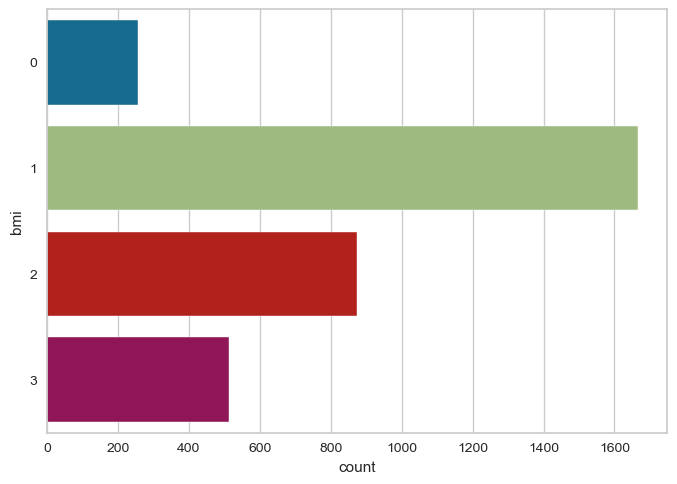

In [4]:
sns.countplot(y="bmi", data=train_data)

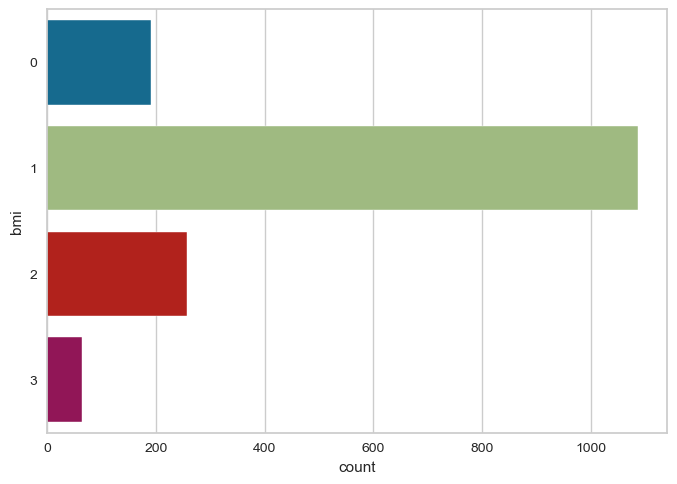

In [5]:
sns.countplot(y="bmi", data=test_data)

In [6]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [7]:
s = setup(data=train_data, target='bmi', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,bmi
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(3308, 55)"
5,Missing Values,True
6,Numeric Features,35
7,Categorical Features,19
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best = compare_models(errors="raise")

IntProgress(value=0, description='Processing: ', max=74)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:18:55
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
plot_model(best, plot='feature')

VO2Max prediction

In [32]:
from pycaret.regression import *

In [33]:
data = fitbit_df.drop(columns=['date', 'gender', 'age', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [34]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

Don't look for imbalance in regression

In [35]:
s = setup(data=train_data, target='filteredDemographicVO2Max', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,filteredDemographicVO2Max
2,Original Data,"(3308, 54)"
3,Missing Values,True
4,Numeric Features,34
5,Categorical Features,19
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2606, 72)"


In [36]:
best = compare_models(errors="raise")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,4.9801,39.1709,6.2444,0.0536,0.1356,0.1115,2.2033
ada,AdaBoost Regressor,5.1760,41.0934,6.3604,0.0258,0.1381,0.1160,0.3767
en,Elastic Net,5.0504,41.1583,6.3913,0.0145,0.1387,0.1131,0.0567
et,Extra Trees Regressor,5.0681,41.9607,6.4117,0.0045,0.1393,0.1134,1.0133
gbr,Gradient Boosting Regressor,5.1699,43.4256,6.5210,-0.0293,0.1409,0.1150,0.8700
dummy,Dummy Regressor,5.5952,46.0940,6.7483,-0.0933,0.1468,0.1261,0.0300
llar,Lasso Least Angle Regression,5.5952,46.0940,6.7483,-0.0933,0.1468,0.1261,0.0467
lightgbm,Light Gradient Boosting Machine,5.3004,45.7186,6.7341,-0.1089,0.1459,0.1189,0.9167
rf,Random Forest Regressor,5.2321,45.5566,6.7331,-0.1133,0.1458,0.1174,1.7233
br,Bayesian Ridge,5.1841,47.3593,6.8181,-0.1139,0.1454,0.1156,0.0667


In [37]:
best

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)

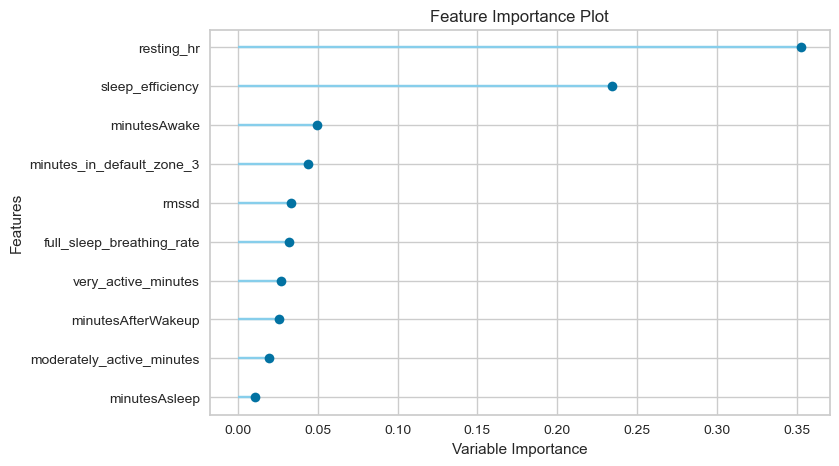

In [38]:
plot_model(best, plot='feature')